In [73]:

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Naive Bayes (Gaussian) has been reported as performing well on this dataset
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Function for splitting training and test set
from sklearn.model_selection import train_test_split 

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc



This is a classification task. We are trying to predict which loans will default.
Here we follow a standard ML workflow. We split our data into train and tet sets and will parametrize and test the performance of 4 classification algorithms. The 4 algorithms used will be :
* Regularized L1 logistic regression  - penalize the absolute size of model coefficients.
* Regularized L2 logistic regresion -  penalize the squared size of model coefficients.
* Random Forest Classifier
* Gradient Boosting Classifier

The model will give us a probability of whether a loan will default or not.

In [102]:
# Load analytical base table from Module 2
df = pd.read_csv('lc_analytical_base_table.csv', nrows=2000)

In [103]:
df.head().T


,0,1,2,3,4
acc_open_past_24mths,4.00,1.00,8.00,9.00,9.00
annual_inc,105000.00,115000.00,80000.00,90000.00,80000.00
delinq_2yrs,1.00,0.00,1.00,0.00,0.00
dti,6.17,3.94,27.05,25.42,21.54
grade,4.00,1.00,5.00,3.00,2.00
inq_fi,2.00,1.00,1.00,0.00,3.00
inq_last_12m,2.00,0.00,0.00,2.00,4.00
inq_last_6mths,1.00,0.00,0.00,0.00,3.00
installment,623.42,375.88,1228.12,271.84,97.40
loan_amnt,17000.00,12000.00,30950.00,8000.00,3000.00


In [104]:
# Create separate object for target variable
y = df["loan_status"]

# Create separate object for input features
X = df.drop("loan_status", axis=1)

We will split the train/test set 80/20.  We also stratify to ensure the target feature is balanced in each subset of data.

In [105]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df["loan_status"])

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )


1600 400 1600 400


In [106]:
X_test

,acc_open_past_24mths,annual_inc,delinq_2yrs,dti,grade,inq_fi,inq_last_12m,inq_last_6mths,installment,loan_amnt,max_bal_bc,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,fico_range_avg,earliest_cr_line_years,emp_length_years,emp_length_years_missing,term_years,application_type_Individual,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
96,12.0,250000.00,1.0,17.34,1.0,7.0,5.0,1.0,1238.93,40000.0,12212.0,132.0,0.0,0.0,3.0,0.0,2.0,5.0,5.0,11.0,21.0,11.0,23.0,5.0,18.0,0.0,8.0,18.0,7.0,6.0,3.0,6.0,5.0,6.0,97.9,0.0,0.0,25095.0,0.0,0.0,515614.0,629447.0,48.0,194782.0,169687.0,58900.0,1.0,191847.0,82000.0,737.0,28,2.0,0,3.0,1,0,1,0,0,0,1,0
1540,5.0,95000.00,0.0,16.15,4.0,0.0,1.0,0.0,606.86,17000.0,19169.0,134.0,7.0,7.0,7.0,0.0,1.0,2.0,1.0,10.0,4.0,2.0,11.0,2.0,5.0,0.0,2.0,5.0,0.0,1.0,0.0,1.0,1.0,2.0,100.0,0.0,0.0,20720.0,0.0,0.0,476916.0,530355.0,23.0,60844.0,32952.0,20000.0,0.0,42000.0,24200.0,712.0,12,10.0,0,3.0,1,0,1,0,0,1,0,0
148,8.0,90000.00,0.0,18.83,3.0,0.0,0.0,0.0,583.89,24000.0,10468.0,160.0,8.0,4.0,0.0,0.0,3.0,4.0,5.0,8.0,15.0,7.0,13.0,4.0,9.0,0.0,2.0,9.0,1.0,2.0,1.0,4.0,1.0,4.0,100.0,0.0,0.0,12168.0,0.0,52.0,36532.0,89058.0,29.0,36532.0,24364.0,39800.0,9.0,46058.0,43000.0,742.0,14,2.0,0,5.0,1,0,0,0,1,1,0,0
257,11.0,27000.00,0.0,34.22,4.0,1.0,2.0,0.0,389.36,15000.0,3415.0,95.0,8.0,3.0,1.0,0.0,4.0,10.0,4.0,7.0,17.0,12.0,19.0,10.0,25.0,0.0,5.0,25.0,2.0,12.0,2.0,6.0,3.0,4.0,100.0,1.0,1.0,17268.0,0.0,0.0,216551.0,237466.0,37.0,81571.0,64303.0,8000.0,6.0,69902.0,30100.0,672.0,12,1.0,0,5.0,0,1,1,0,0,0,1,0
324,9.0,75000.00,1.0,3.06,2.0,0.0,3.0,1.0,199.26,6000.0,3007.0,191.0,1.0,1.0,2.0,0.0,3.0,4.0,6.0,8.0,2.0,16.0,21.0,4.0,17.0,0.0,5.0,17.0,1.0,0.0,0.0,1.0,4.0,7.0,96.0,1.0,1.0,5951.0,0.0,0.0,242792.0,261400.0,25.0,5951.0,0.0,10500.0,0.0,0.0,21400.0,712.0,17,10.0,0,3.0,1,0,1,0,0,0,1,0
1936,2.0,32000.00,1.0,24.49,2.0,0.0,2.0,0.0,483.52,15000.0,3563.0,186.0,5.0,5.0,1.0,1.0,3.0,3.0,3.0,7.0,3.0,4.0,13.0,3.0,6.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,88.2,0.0,0.0,7084.0,0.0,0.0,42154.0,57508.0,17.0,24002.0,16918.0,13000.0,0.0,21500.0,13000.0,682.0,16,1.0,0,3.0,0,1,1,0,0,1,0,0
1675,6.0,100000.00,0.0,39.91,1.0,0.0,0.0,0.0,250.59,8000.0,14631.0,134.0,13.0,7.0,2.0,0.0,3.0,6.0,3.0,3.0,15.0,7.0,10.0,6.0,14.0,0.0,1.0,14.0,0.0,6.0,1.0,4.0,0.0,2.0,100.0,0.0,0.0,46506.0,0.0,0.0,255361.0,343182.0,27.0,138097.0,91591.0,29100.0,2.0,121269.0,62300.0,717.0,13,10.0,0,3.0,1,0,1,0,0,0,1,0
36,5.0,95000.00,1.0,12.99,4.0,0.0,2.0,0.0,452.29,12500.0,7246.0,202.0,16.0,7.0,0.0,0.0,2.0,4.0,4.0,9.0,7.0,7.0,18.0,4.0,9.0,0.0,1.0,9.0,0.0,2.0,1.0,2.0,0.0,3.0,80.0,0.0,0.0,10579.0,0.0,0.0,29921.0,57947.0,25.0,29921.0,19342.0,20500.0,1.0,33847.0,24100.0,682.0,17,1.0,0,3.0,1,0,0,0,1,1,0,0
4,9.0,80000.00,0.0,21.54,2.0,3.0,4.0,3.0,97.40,3000.0,1163.0,42.0,5.0,4.0,0.0,0.0,2.0,2.0,5.0,5.0,19.0,6.0,6.0,2.0,16.0,0.0,5.0,16.0,5.0,9.0,3.0,6.0,1.0,2.0,76.9,0.0,0.0,1330.0,0.0,0.0,64327.0,87665.0,26.0,64327.0,62906.0,12100.0,2.0,71674.0,15900.0,707.0,8,2.0,0,3.0,1,0,0,0,1,1,0,0
1880,8.0,57054.00,0.0,11.51,5.0,2.0,2.0,1.0,459.18,16000.0,314.0,282.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,8.0,13.0,4.0,10.0,0.0,6.0,10.0,4.0,1.0,2.0,3.0,4.0,5.0,88.2,0.0,0.0,37382.0,0.0,0.0,318341.0,417166.0,17.0,48148.0,10766.0,7500.0,1.0,10766.0,56400.0,717.0,24,10.0,0,5.0,1,0,1,0,0,0,0,1


We will use 4 classification algorithms, create pipelines for each and set algorithm hyperparameters.
Note that we standardize the feature values but subtracting means and dividing by stanard deviation across the feature set.

In [107]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1' , random_state=123)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'gnb' : make_pipeline(GaussianNB()),
    'bnb' : make_pipeline(BernoulliNB()), 
    'mnb' : make_pipeline(MultinomialNB())
}

In [54]:
np.linspace(1e-3, 1e3, 10)

array([1.00000e-03, 1.11112e+02, 2.22223e+02, 3.33334e+02, 4.44445e+02,
       5.55556e+02, 6.66667e+02, 7.77778e+02, 8.88889e+02, 1.00000e+03])

we will test a range of penalties from 0.001 to 1000 for the l1 and l2 algorithms.

In [108]:
# Logistic Regression hyperparameters
l1_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}
l2_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}
#Gradient Boosting hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [109]:
gnb_hyperparameters = {}
bnb_hyperparameters = {}
mnb_hyperparameters = {}

In [110]:

hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'gnb': gnb_hyperparameters,
    'bnb': bnb_hyperparameters,
    'mnb': mnb_hyperparameters
}


Use cross validation to tune each model. Here we use 10 fold cross-validation - i.e., we iteratively create 9 folds plus 1 hold-out fold and will average the training score over the 10 hold-out folds. 

In [111]:
fitted_models = {}
algs_to_test = ['gb']

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    if name in algs_to_test:
        model.fit(X_train, y_train)
        fitted_models[name] = model
        print(name, 'has been fitted.')

gb has been fitted.


Let's look at the holdout accuracy scores. This is the percent of observations correctly classified by the models. Note that our data is heavily imbalanced with 80% target values equal to loan paid.
Holdout accuracy scores are not robust to imbalanced data sets.

In [112]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

gb 0.873125


In [113]:
#Predict classes using L1-regularized logistic regression 
pred = fitted_models['gb'].predict(X_test)

# Display first 5 predictions
pred[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display confusion matrix for y_test and pred
print( confusion_matrix(y_test, pred) )



[[349   0]
 [ 51   0]]



    The first column includes observations that were predicted to be 1.
    The second column includes observations that were predicted to be 0.
    The first row includes observations that were actually 1.
    The second row includes observations that were actually 0.
3625 were true positives (first column, first row)
154 were true negatives (second column, second row)
On the other hand, 1153 were incorrectly classified.
938 were false positives (first column, second row)
115 were false negatives (second column, first row)

In [89]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['gb'].predict_proba(X_test)

# show the prediction for the positive class, i.e. loan default
pred = [p[1] for p in pred]

# Display first 5 predictions
pred[:10]


[0.07671347672587087,
 0.1063305823695252,
 0.08280947781417335,
 0.15194620197270936,
 0.06134043085475642,
 0.09527862491630931,
 0.16651057582017945,
 0.14259081515781333,
 0.16064559824401195,
 0.08280947781417335]

In [90]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [91]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds}).tail(10)

,FPR,TPR,Thresholds
56,0.861272,0.851852,0.076713
57,0.867052,0.851852,0.076599
58,0.901734,0.851852,0.074261
59,0.901734,0.888889,0.073634
60,0.919075,0.888889,0.071887
61,0.919075,0.925926,0.069683
62,0.936416,0.925926,0.065780
63,0.953757,0.925926,0.064397
64,0.965318,0.925926,0.063299
65,1.000000,1.000000,0.061340


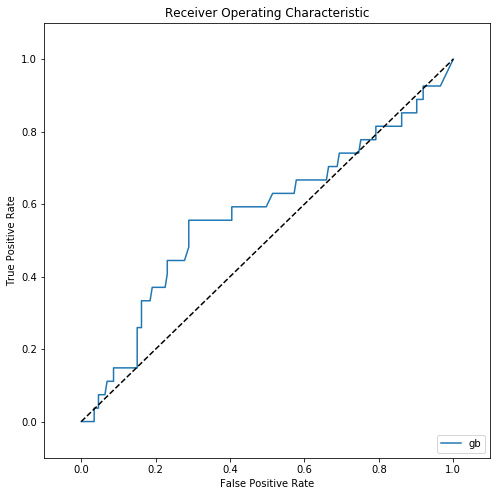

In [92]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='gb')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [93]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate AUROC
print( auc(fpr, tpr) )

0.5724684221794047


The AUROC metric is robust against imbalanced classes and tells us the the likelihood that our model can distinguish between a randomly chosen loan that will default versus a randomly chosen loan that will not default.

In [94]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print( name, auc(fpr, tpr) )

gb 0.5724684221794047


In [54]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)